In [1]:
# tensorflow와 tf.keras를 임포트
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴
mnist = keras.datasets.mnist
data_train, data_test = mnist.load_data()
train_images, train_labels = data_train
test_images, test_labels = data_test

In [2]:
print('train_images.shape =', train_images.shape)
print('test_images.shape =', test_images.shape)
print('train_labels.shape =', train_labels.shape)
print('test_labels.shape =', test_labels.shape)

train_images.shape = (60000, 28, 28)
test_images.shape = (10000, 28, 28)
train_labels.shape = (60000,)
test_labels.shape = (10000,)


In [3]:
num = train_images[0]
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(num[i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

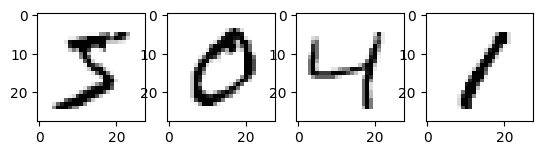

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap='Greys') # 첫 번째 훈련용 데이터
ax2.imshow(train_images[1], cmap='Greys') # 두 번째 훈련용 데이터
ax3.imshow(train_images[2], cmap='Greys') # 세 번째 훈련용 데이터
ax4.imshow(train_images[3], cmap='Greys') # 네 번째 훈련용 데이터

In [5]:
print('train_labels[:4] =', train_labels[:4])

train_labels[:4] = [5 0 4 1]


In [6]:
# 입력값 전처리 : 0에서 1사이의 값으로 입력 데이터를 가공함
train_images, test_images = train_images / 255, test_images / 255

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()   # 모델의 구조를 요약하여 살펴보자

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2271 - accuracy: 0.9345
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0947 - accuracy: 0.9717
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0631 - accuracy: 0.9813
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0453 - accuracy: 0.9862
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0339 - accuracy: 0.9893


In [11]:
model.save('./simple_model.keras')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.0657 - accuracy: 0.9802 - 882ms/epoch - 3ms/step

테스트 정확도: 0.9801999926567078


In [12]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28, 28)),
   keras.layers.Dense(256, activation='relu'),
   keras.layers.Dense(128, activation='relu'),
   keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',\
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

train_images, test_images = train_images / 255, test_images / 255
model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images,  test_labels,\
                                     verbose=0)
print('\n테스트 정확도:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6162 - accuracy: 0.8100
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3085 - accuracy: 0.9078
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2290 - accuracy: 0.9309
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1744 - accuracy: 0.9475
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1422 - accuracy: 0.9571
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1192 - accuracy: 0.9633
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1014 - accuracy: 0.9689
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0892 - accuracy: 0.9728
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0775 - accuracy: 0.9759
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step - l

In [13]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape=(28, 28)),
   keras.layers.Dense(1256, activation='relu'),
   keras.layers.Dense(512, activation='relu'),
   keras.layers.Dense(256, activation='relu'),
   keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',\
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

train_images, test_images = train_images / 255, test_images / 255
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels,\
                                     verbose=0)
print('\n테스트 정확도:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 2.3016 - accuracy: 0.1121
Epoch 2/10
1875/1875 [==============================] - 49s 26ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 48s 26ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 48s 25ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 48s 26ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 48s 26ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 47s 25ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 48s 26ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 10/10
1875/1875 [==============================] - 47s 25m

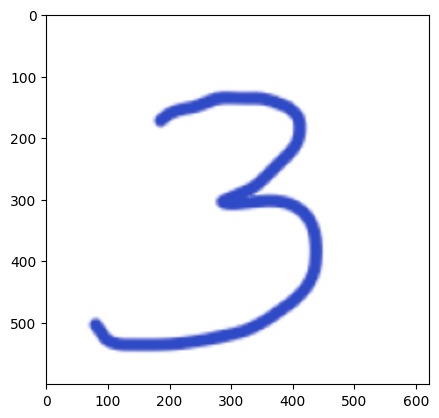

In [14]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('./myNumber.png')
plt.imshow(img)

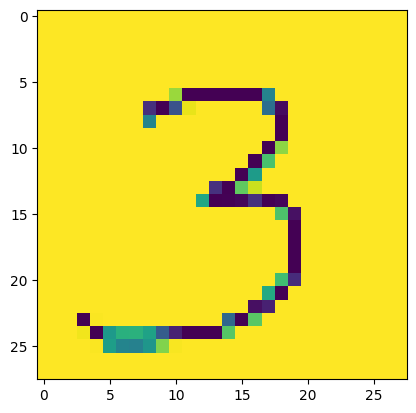

In [15]:
import cv2
img = cv2.imread('./myNumber.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28) )
plt.imshow(img)

In [17]:
model = keras.models.load_model('./simple_model.keras')
pred = model.predict(img[np.newaxis, :, :])
pred.argmax()

1/1 [==============================] - 0s 195ms/step


6

In [18]:
for i in range(28):
    for j in range(28):
        print('{:4d}'.format(img[i][j]), end='')
    print()

 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 229  80  80  80  80  80  80 158 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 104  80 124 249 255 255 255 255 255 143  85 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 159 255 255 255 255 255 255 255 255 255  80 255 255 255 255 255

In [19]:
# 이미지의 색상을 반전시키고 0에서 1사이의 실수로 만들자
img = (255 - img) / 255
pred = model.predict( img[np.newaxis, :, :])
pred.argmax()

1/1 [==============================] - 0s 64ms/step


3

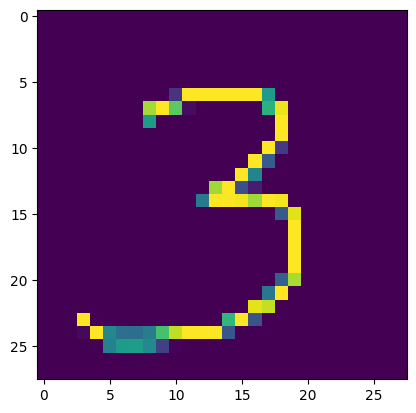

In [20]:
plt.imshow(img)